In [1]:
from sklearn.base import TransformerMixin
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\datas")

In [3]:
df=pd.read_csv('data.tsv', sep='\t',low_memory=False)

In [4]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647549 entries, 0 to 7647548
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 525.1+ MB


In [6]:
df.isnull().sum()

tconst             0
titleType          0
primaryTitle       8
originalTitle      8
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [7]:
df.drop('tconst',axis=1,inplace=True)
df=df.reset_index()
df.rename(columns={"index":'ID'},inplace=True)

In [8]:
df.head()

,ID,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,2,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,3,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,4,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
for i in df.columns:
    if np.dtype(df['{}'.format(i)])==np.dtype('O'):
        print("Column name: {}".format(i))
        print("Unique values" ,df['{}'.format(i)].unique(),end="\n")
        print(end='\n')

Column name: titleType
Unique values ['short' 'movie' 'tvShort' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'audiobook' 'radioSeries' 'episode']

Column name: primaryTitle
Unique values ['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ...
 'Danira Boukhriss Terkessidis' "Horrid Henry's Comic Caper"
 'Horrid Henry Knows It All']

Column name: originalTitle
Unique values ['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ...
 'Danira Boukhriss Terkessidis' "Horrid Henry's Comic Caper"
 'Horrid Henry Knows It All']

Column name: isAdult
Unique values ['0' '1' '2019' '1981' '2020' '2017' '\\N' '2014' '2005']

Column name: startYear
Unique values ['1894' '1892' '1893' '1895' '1896' '1898' '1897' '1900' '1899' '1901'
 '1904' '1903' '1902' '1905' '1912' '1907' '1906' '1908' '1910' '1909'
 '1914' '1911' '1913' '1915' '1919' '1916' '1917' '1918' '1936' '1925'
 '1920' '1922' '1921' '1923' '2019' '1924' '1928' '1926' '1927' '1929'
 '2000' '1993' '1

In [10]:
df=df.replace('\\N',np.nan)

In [11]:
for i in df[(df['isAdult']!='0')&(df['isAdult']!='1')].isAdult.unique():
    df.isAdult.replace('{}'.format(i),np.nan,inplace=True)

In [12]:
df['runtimeMinutes']=pd.to_numeric(df['runtimeMinutes'],errors='coerce')

In [13]:
df.isnull().sum()

ID                      0
titleType               0
primaryTitle            8
originalTitle           8
isAdult                10
startYear          780456
endYear           7574669
runtimeMinutes    5490720
genres             595501
dtype: int64

In [14]:
df.drop('endYear',axis=1,inplace=True)

In [15]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
        Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [16]:
df = DataFrameImputer().fit_transform(df)

In [17]:
df.runtimeMinutes=df.runtimeMinutes.astype('int')

In [18]:
df.isnull().sum()

ID                0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [19]:
sep_genres=df.genres.str.split(',',expand=True)
all_genres=pd.unique(sep_genres[:].values.ravel(order='K'))

In [20]:
grouped_genres=pd.DataFrame()
for i in range(all_genres.shape[0]-1):
    sep_genres=df[df.genres.str.contains(all_genres[i])]
    grouped_genres[all_genres[i]]=sep_genres.groupby(['startYear']).genres.count()

In [21]:
grouped_genres=grouped_genres.replace(np.nan,0)
grouped_genres=grouped_genres.astype('int')
grouped_genres

,Documentary,Animation,Comedy,Short,Romance,News,Drama,Fantasy,Horror,Biography,...,War,Sci-Fi,Western,Thriller,Sport,Film-Noir,Talk-Show,Game-Show,Adult,Reality-TV
startYear,,,,,,,,,,,,,,,,,,,,,
1874,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1878,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1881,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1883,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1887,14,0,0,45,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,4478,2881,9771,7775,3071,4123,20237,1228,2215,577,...,109,1233,111,2383,1557,0,5423,1494,809,2966
2022,153,141,262,244,62,0,600,73,222,39,...,24,112,18,171,19,0,2,4,0,4
2023,8,11,24,28,10,0,68,9,17,5,...,2,10,0,14,4,0,2,0,1,0


In [22]:
grouped_genres.columns

Index(['Documentary', 'Animation', 'Comedy', 'Short', 'Romance', 'News',
       'Drama', 'Fantasy', 'Horror', 'Biography', 'Music', 'Crime', 'Family',
       'Adventure', 'Action', 'History', 'Mystery', 'Musical', 'War', 'Sci-Fi',
       'Western', 'Thriller', 'Sport', 'Film-Noir', 'Talk-Show', 'Game-Show',
       'Adult', 'Reality-TV'],
      dtype='object')

In [23]:
grouped_genres.columns=grouped_genres.columns.str.lower()

In [24]:
for i in grouped_genres.columns:
    new_col_names=re.sub(r'-','_',i)
    grouped_genres.rename(columns={'{}'.format(i):'{}'.format(new_col_names)},inplace=True)
grouped_genres.columns

Index(['documentary', 'animation', 'comedy', 'short', 'romance', 'news',
       'drama', 'fantasy', 'horror', 'biography', 'music', 'crime', 'family',
       'adventure', 'action', 'history', 'mystery', 'musical', 'war', 'sci_fi',
       'western', 'thriller', 'sport', 'film_noir', 'talk_show', 'game_show',
       'adult', 'reality_tv'],
      dtype='object')

In [25]:
data = grouped_genres[(grouped_genres.index<='2021')&(grouped_genres.index>='1990')]

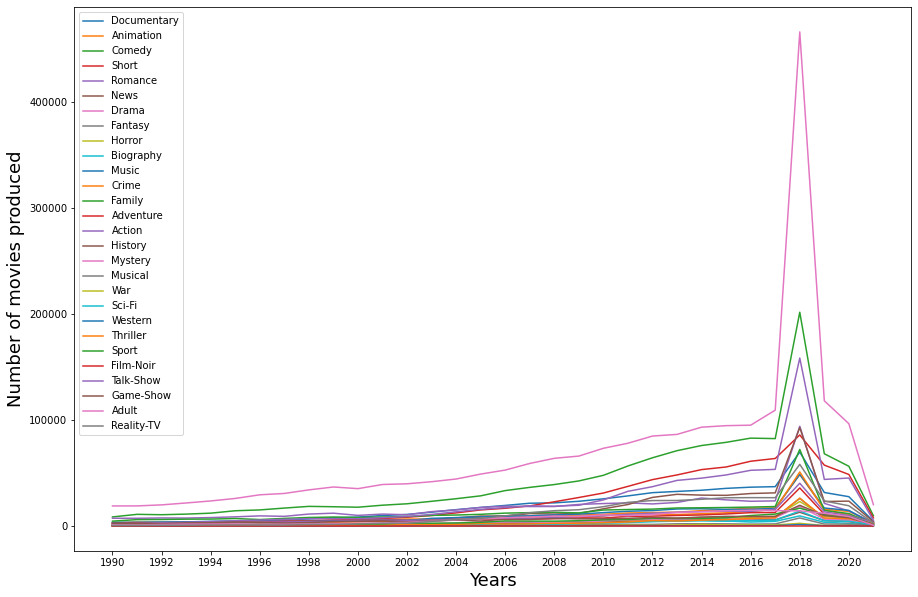

In [26]:
plt.figure(figsize=(15,10))
plt.plot(data)

plt.xticks(np.arange(0,31, step =2))
plt.legend(all_genres)
plt.yscale(value= 'linear')
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Years', size = 18)
plt.show()

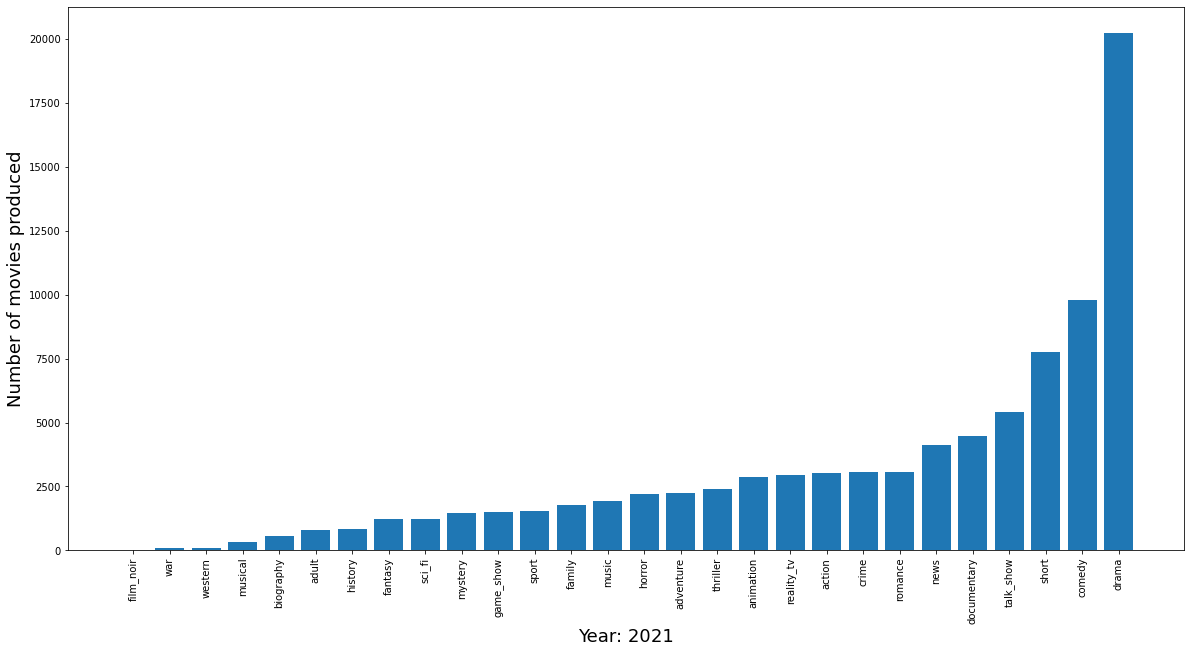

In [27]:
movie_types = np.array(grouped_genres.columns)
num_movies = np.array(grouped_genres.loc['2021',:])
sorted_indexes = np.argsort(num_movies)

plt.figure(figsize=(20, 10))
plt.bar(x = movie_types[sorted_indexes], height = num_movies[sorted_indexes])
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Year: 2021', size = 18)

plt.xticks(fontsize=10,rotation='vertical')

plt.show()

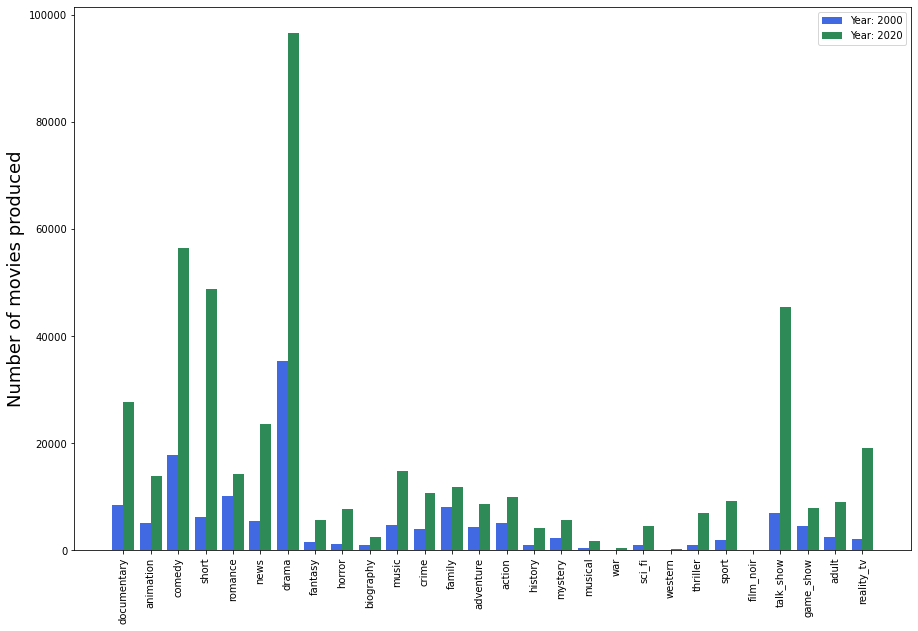

In [28]:
labels = grouped_genres.columns
y2000 = grouped_genres.loc['2000',:]
y2020 = grouped_genres.loc['2020',:]
ind = np.arange(28)
width = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, y2000, width, color='royalblue')


rects2 = ax.bar(ind+width, y2020, width, color='seagreen')

fig.set_size_inches(15, 10)

ax.set_ylabel('Number of movies produced', rotation = 'vertical', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels, rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Year: 2000', 'Year: 2020'))

plt.show()

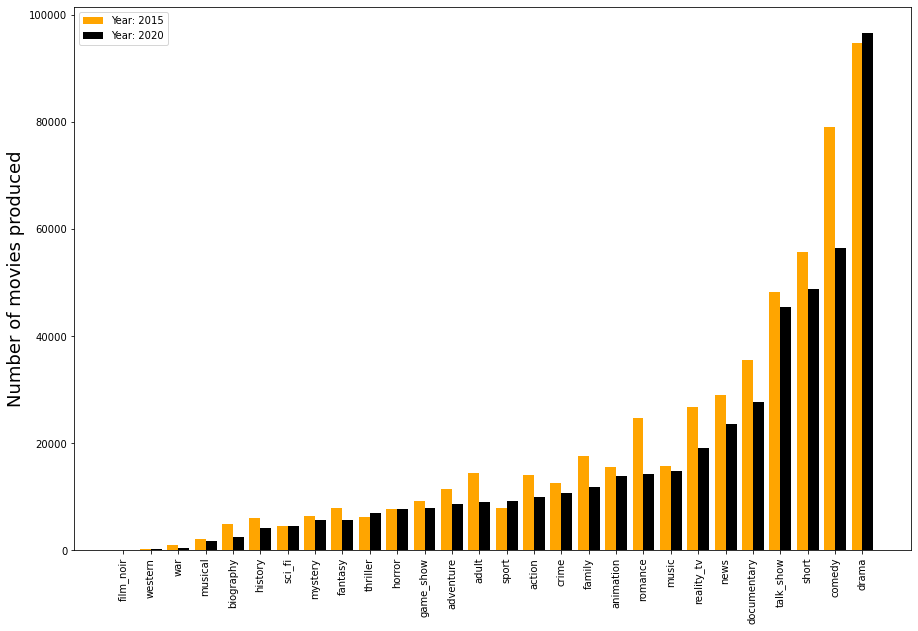

In [30]:
labels = np.array(grouped_genres.columns)
y_1 = np.array(grouped_genres.loc['2020',:])
y_2 = np.array(grouped_genres.loc['2015',:])
sorted_indexes_year = np.argsort(y_1)
labels = labels[sorted_indexes_year]
y1 = y_1[sorted_indexes_year]
y2 = y_2[sorted_indexes_year]

ind = np.arange(28)
width = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, y2, width, color='orange')

rects2 = ax.bar(ind+width, y1, width, color='black')

fig.set_size_inches(15, 10)

ax.set_ylabel('Number of movies produced', rotation = 'vertical', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels, rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Year: 2015', 'Year: 2020'))

plt.show()